# Load your CSV dataset.

In [15]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv")

# Display the first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

# Show basic information about the dataset
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Basic statistics
print("\nBasic Statistical Description:")
print(df.describe())


First 5 rows of the dataset:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), obje

# Encode Labels & Train-Test Split

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Separate features and target
X = df.drop("label", axis=1)
y = df["label"]

# Encode crop labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Normalize feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check shape
print("Training feature shape:", X_train_scaled.shape)
print("Test feature shape:", X_test_scaled.shape)
print("Unique labels:", label_encoder.classes_)


Training feature shape: (1760, 7)
Test feature shape: (440, 7)
Unique labels: ['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']


# Train a Classifier

Accuracy on Test Set: 0.9931818181818182

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange    

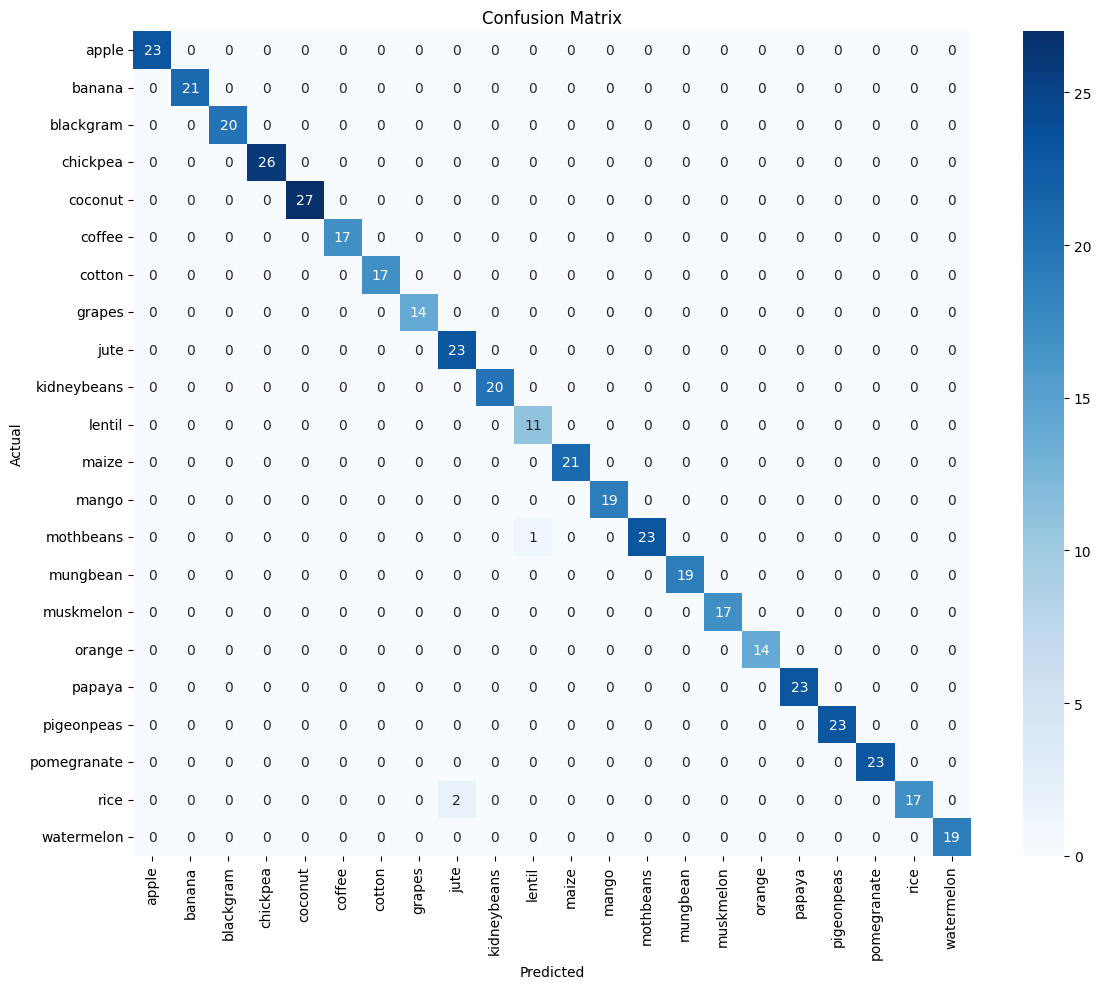

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Plot confusion matrix
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


# Save the Model and Label Encoder

In [18]:
import joblib

# Save the trained model
joblib.dump(model, "crop_recommendation_model.pkl")

# Save the label encoder
joblib.dump(label_encoder, "label_encoder.pkl")

# Save the scaler too (important for prediction)
joblib.dump(scaler, "scaler.pkl")

print("Model, label encoder, and scaler saved successfully!")


Model, label encoder, and scaler saved successfully!


 # Feature Importance Visualization

<ipython-input-19-9e71722cacb0>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=feature_names[indices], palette="viridis")


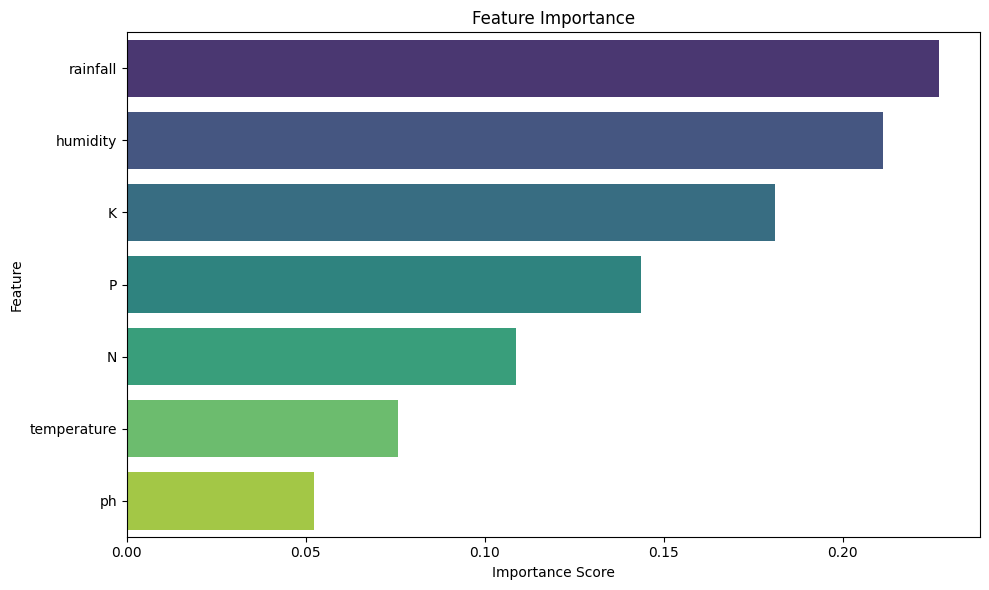

In [19]:
import numpy as np

# Get feature importances from the Random Forest model
importances = model.feature_importances_
feature_names = X.columns

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=feature_names[indices], palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


# Custom Prediction Function

In [20]:
import joblib
import numpy as np

# 🔹 Step 1: Load trained model and label encoder
model = joblib.load('crop_recommendation_model.pkl')
label_encoder = joblib.load('label_encoder.pkl')

# 🔹 Step 2: Input values with clear labels and valid ranges
# Feature Ranges:
# - Nitrogen (N):        0 to 140
# - Phosphorus (P):      5 to 145
# - Potassium (K):       5 to 205
# - Temperature (°C):    8 to 44
# - Humidity (%):        14 to 100
# - pH:                  3.5 to 9.9
# - Rainfall (mm):       20 to 300

nitrogen     = 90     # in ppm (0–140)
phosphorus   = 42     # in ppm (5–145)
potassium    = 43     # in ppm (5–205)
temperature  = 22.0   # in degree Celsius (8–44)
humidity     = 80.0   # in % (14–100)
ph           = 6.5    # pH level (3.5–9.9)
rainfall     = 200.0  # in mm (20–300)

# 🔹 Step 3: Create input array
sample_input = np.array([[nitrogen, phosphorus, potassium, temperature, humidity, ph, rainfall]])

# 🔹 Step 4: Predict encoded label
predicted_label_index = model.predict(sample_input)[0]

# 🔹 Step 5: Decode label to actual crop name
predicted_crop = label_encoder.inverse_transform([predicted_label_index])[0]

# 🔹 Step 6: Output result
print("🌾 Based on your input conditions, the recommended crop is:", predicted_crop)


🌾 Based on your input conditions, the recommended crop is: apple


In [21]:
import joblib
import numpy as np

# 🔹 Step 1: Load trained model and label encoder
model = joblib.load('crop_recommendation_model.pkl')
label_encoder = joblib.load('label_encoder.pkl')

# 🔹 Step 2: Input values with clear labels and valid ranges
# Feature Ranges:
# - Nitrogen (N):        0 to 140
# - Phosphorus (P):      5 to 145
# - Potassium (K):       5 to 205
# - Temperature (°C):    8 to 44
# - Humidity (%):        14 to 100
# - pH:                  3.5 to 9.9
# - Rainfall (mm):       20 to 300

nitrogen     = 120     # in ppm (0–140)
phosphorus   = 80     # in ppm (5–145)
potassium    = 100     # in ppm (5–205)
temperature  = 30.0   # in degree Celsius (8–44)
humidity     = 100.0   # in % (14–100)
ph           = 6.5    # pH level (3.5–9.9)
rainfall     = 200.0  # in mm (20–300)

# 🔹 Step 3: Create input array
sample_input = np.array([[nitrogen, phosphorus, potassium, temperature, humidity, ph, rainfall]])

# 🔹 Step 4: Predict encoded label
predicted_label_index = model.predict(sample_input)[0]

# 🔹 Step 5: Decode label to actual crop name
predicted_crop = label_encoder.inverse_transform([predicted_label_index])[0]

# 🔹 Step 6: Output result
print("🌾 Based on your input conditions, the recommended crop is:", predicted_crop)


🌾 Based on your input conditions, the recommended crop is: apple
